In [ ]:
! pip install kaggle

In [ ]:
! mkdir kaggle

In [ ]:
! cp kaggle.json /content/kaggle

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d brsdincer/vehicle-detection-image-set

 95% 330M/346M [00:07<00:00, 36.3MB/s]
100% 346M/346M [00:07<00:00, 48.7MB/s]


In [ ]:
!unzip intel-image-classification.zip

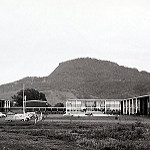

In [ ]:
# import cv2
# from google.colab.patches import cv2_imshow
# cved=cv2.imread("/content/seg_train/seg_train/buildings/0.jpg")
# cv2_imshow(cved)

In [ ]:
wid = cved.shape[1]
hgt = cved.shape[0]
print(str(wid) + "x" + str(hgt))

150x150


## Main code starts here

In [ ]:
import numpy as np
# for non-vehicle
with open('/content/drive/MyDrive/Vehicle_dataset_array/Trainnonveh.npy', 'rb') as f:
    Y = np.load(f)

In [ ]:
# for vehicle
with open('/content/drive/MyDrive/Vehicle_dataset_array/Trainveh.npy', 'rb') as t:
    X = np.load(t)

In [ ]:
X.shape

(8792, 64, 64, 3)

In [ ]:
Y.shape

(8968, 64, 64, 3)

In [53]:
import keras

In [21]:
import sys
from matplotlib import pyplot
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten,Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization

In [ ]:
train_path = '/content/seg_train/seg_train'
valid_path = '/content/seg_test/seg_test'

In [22]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

ValueError: ignored

In [32]:
model = Sequential()


model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(64,64, 3)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

# model.add(Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# model.add(Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# model.add(Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# model.add(Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
#model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))

model.add(Dense(2, activation='softmax'))
#opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,width_shift_range=0.2, height_shift_range=0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/seg_train/seg_train',
                                                 target_size = (224,224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/seg_test/seg_test',
                                            target_size = (224,224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [ ]:
Model1 = model.fit_generator( # with dropout(0.2,0.2,0.3,0.4,0.5,0.6)
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/50
254/439 [================>.............] - ETA: 2:54 - loss: 8.7767 - accuracy: 0.1692

In [ ]:
## trying with array

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!unzip /content/drive/MyDrive/Vehicle_dataset_array/archive_unsampled.zip

In [3]:
import numpy as np                     
import matplotlib.pyplot as plt
import os
import cv2 as cv
import random
from tqdm import tqdm
from keras.preprocessing import image

In [4]:
path = '/content/data_unsampled/'
train = os.listdir(path)

In [5]:
folders=[]
folders = [f for f in sorted(os.listdir(path))]
print(folders)

['non-vehicles', 'vehicles']


In [6]:
labels = folders
print (f'The labels are {labels}')
 
# setting the size of images that we want
 
image_size = 224
print(f'All images to be resized into {image_size}*{image_size} pixels')

The labels are ['non-vehicles', 'vehicles']
All images to be resized into 224*224 pixels


In [7]:
def load_train5(path):
    
    images = []
    
    for label in labels:
        direc = os.path.join(path, label)
        class_num = labels.index(label)
        
        for image in os.listdir(direc):
            image_read = cv.imread(os.path.join(direc,image))
            #image_resized = cv.resize(image_read,(image_size,image_size),3)#modified here for getting output as (1,224,224,3) not as (224,224)
            images.append([image_read,class_num])
            
    return np.array(images)

In [8]:
#loading without Grayscale 
train_images5 = load_train5(path)
 
print(f'Shape of the training images = {train_images5.shape}')

Shape of the training images = (17760, 2)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


In [11]:
train_images5[0][1]

0

In [12]:
#loading the images and labels seperately in X and y, to be used later for training
X5 = []
y5 = []

for feature, label in train_images5:
    X5.append(feature)
    y5.append(label)
    
print (f'Length of X = {len(X5)}')
print (f'Length of y = {len(y5)}')

Length of X = 17760
Length of y = 17760


In [26]:
X51=np.array(X5)
y51= np.array(y5)

In [41]:
X51.shape

(17760, 64, 64, 3)

In [27]:
y51[8967]

0

In [28]:
y51[8968]

1

In [15]:
from sklearn.model_selection import train_test_split

In [30]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X51, y51, test_size=0.2,random_state = 32)

In [34]:
X_train3.shape

(14208, 64, 64, 3)

In [43]:
m2=model.fit(X_train3,training_labels,epochs=25,validation_data=(X_test3,testing_labels1)) ## this was from second time running

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


Epoch 1/25
444/444 [==============================] - 68s 153ms/step - loss: 0.6932 - accuracy: 0.5060 - val_loss: 0.6932 - val_accuracy: 0.5008
Epoch 2/25
444/444 [==============================] - 62s 139ms/step - loss: 0.6937 - accuracy: 0.5059 - val_loss: 0.6932 - val_accuracy: 0.5008
Epoch 3/25
444/444 [==============================] - 62s 140ms/step - loss: 0.6933 - accuracy: 0.5017 - val_loss: 0.6933 - val_accuracy: 0.5008
Epoch 4/25
444/444 [==============================] - 62s 140ms/step - loss: 0.6931 - accuracy: 0.5060 - val_loss: 0.6932 - val_accuracy: 0.5008
Epoch 5/25
444/444 [==============================] - 67s 151ms/step - loss: 0.6985 - accuracy: 0.5057 - val_loss: 0.6932 - val_accuracy: 0.5008
Epoch 6/25
444/444 [==============================] - 62s 139ms/step - loss: 0.6933 - accuracy: 0.5060 - val_loss: 0.6933 - val_accuracy: 0.5008
Epoch 7/25
444/444 [==============================] - 67s 151ms/step - loss: 0.6931 - accuracy: 0.5060 - val_loss: 0.6932 - val_ac

In [38]:
m1=model.fit(X_train3,training_labels,epochs=25,validation_data=(X_test3,testing_labels1))## this was for first time running

Epoch 1/25


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


444/444 [==============================] - 64s 144ms/step - loss: 90.6363 - accuracy: 0.8569 - val_loss: 0.6949 - val_accuracy: 0.7832
Epoch 2/25
444/444 [==============================] - 69s 154ms/step - loss: 0.1405 - accuracy: 0.9509 - val_loss: 0.0947 - val_accuracy: 0.9662
Epoch 3/25
444/444 [==============================] - 69s 155ms/step - loss: 0.4191 - accuracy: 0.8925 - val_loss: 0.7211 - val_accuracy: 0.5577
Epoch 4/25
444/444 [==============================] - 68s 154ms/step - loss: 0.3495 - accuracy: 0.8495 - val_loss: 0.2423 - val_accuracy: 0.8981
Epoch 5/25
444/444 [==============================] - 64s 143ms/step - loss: 0.1287 - accuracy: 0.9507 - val_loss: 0.1012 - val_accuracy: 0.9606
Epoch 6/25
444/444 [==============================] - 68s 154ms/step - loss: 0.5729 - accuracy: 0.7568 - val_loss: 0.4241 - val_accuracy: 0.8102
Epoch 7/25
444/444 [==============================] - 68s 153ms/step - loss: 0.4372 - accuracy: 0.8065 - val_loss: 0.5755 - val_accuracy: 0.

In [37]:
tf.config.run_functions_eagerly(True)

In [35]:
import tensorflow as tf
training_labels=tf.keras.utils.to_categorical(y_train3)
testing_labels1=tf.keras.utils.to_categorical(y_test3)

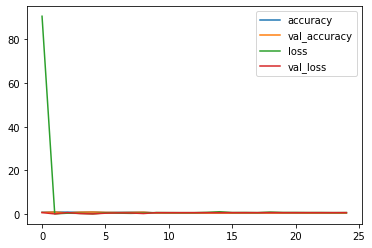

In [39]:
plt.plot(m1.history['accuracy'], label='accuracy')
plt.plot(m1.history['val_accuracy'], label='val_accuracy')
plt.plot(m1.history['loss'], label='loss')
plt.plot(m1.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [41]:
pred2=model.predict(X_test3)
predicted_classes1 = np.argmax(pred2, axis=1)
predicted_classes1

predicted_labels1=tf.keras.utils.to_categorical(predicted_classes1)

from sklearn.metrics import f1_score, confusion_matrix
confusion_matrix(predicted_classes1, y_test3)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


array([[1779, 1773],
       [   0,    0]])

In [42]:
import sklearn
p1=sklearn.metrics.classification_report(y_test3,predicted_classes1)
print(p1)

              precision    recall  f1-score   support

           0       0.50      1.00      0.67      1779
           1       0.00      0.00      0.00      1773

    accuracy                           0.50      3552
   macro avg       0.25      0.50      0.33      3552
weighted avg       0.25      0.50      0.33      3552



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


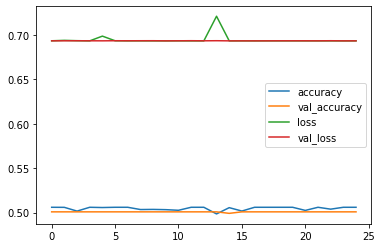

In [44]:
plt.plot(m2.history['accuracy'], label='accuracy')
plt.plot(m2.history['val_accuracy'], label='val_accuracy')
plt.plot(m2.history['loss'], label='loss')
plt.plot(m2.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [45]:
pred2=model.predict(X_test3)
predicted_classes1 = np.argmax(pred2, axis=1)
predicted_classes1

predicted_labels1=tf.keras.utils.to_categorical(predicted_classes1)

from sklearn.metrics import f1_score, confusion_matrix
confusion_matrix(predicted_classes1, y_test3)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


array([[1779, 1773],
       [   0,    0]])

In [46]:
import sklearn
p1=sklearn.metrics.classification_report(y_test3,predicted_classes1)
print(p1)

              precision    recall  f1-score   support

           0       0.50      1.00      0.67      1779
           1       0.00      0.00      0.00      1773

    accuracy                           0.50      3552
   macro avg       0.25      0.50      0.33      3552
weighted avg       0.25      0.50      0.33      3552



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
